# $D_3$ and $E_8$ Lattice Quantization

## Introduction
This notebook demonstrates the encoding and decoding of a normally distributed random variable using the lattices $D_3$ and $E_8$. 
We will build nested lattices, implement the closest-point algorithms for these lattices, and explore how scaling affects the error rate in decoding.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Generate a Random Sample from a Multivariate Normal Distribution
The random variable $x$ is drawn from a multivariate normal distribution $\mathcal{N}(\mu, \sigma^2)$, where each coordinate of $x$ is independent and identically distributed.

In [3]:
# Parameters
mu, sigma = 0, 1 
n = 8  # dimension of the sample

x = np.random.normal(mu, sigma, n)

print(f"Random vector x:\n{x}")

Random vector x:
[-1.26846888 -1.41217966 -0.70383474  0.20596488 -0.93007089  0.69670297
 -1.77294882 -0.04543694]


## Step 2: Closest Point Algorithm for the $D_n$ Lattice
The lattice $D_n$ consists of points where the sum of components is even. Given a point in $\mathbb{R}^n$, we round it to the nearest integers and check which of the two possible points in $D_n$ (with even or odd sums) is closest.

In [4]:
def g_x(x):
    """
    Compute g(x) by rounding the vector x to the nearest integers, 
    but flip the rounding for the coordinate farthest from an integer.
    """
    f_x = np.round(x)

    fractional_parts = np.abs(x - f_x)
    farthest_index = np.argmax(fractional_parts)

    g_x_ = f_x.copy()
    if g_x_[farthest_index] > x[farthest_index]:
        g_x_[farthest_index] = np.floor(x[farthest_index])
    else:
        g_x_[farthest_index] = np.ceil(x[farthest_index])

    return g_x_

def closest_point_Dn(x):
    """
    Find the closest point in the D_n lattice for a given vector x.
    Uses g_x function for flipping rounding.
    """
    f_x = np.round(x)
    g_x_res = g_x(x)
    return f_x if np.sum(f_x) % 2 == 0 else g_x_res


# Find the closest point in D_n lattice for our random vector x
closest_Dn = closest_point_Dn(x)
print(f"Closest point in D_n:\n{closest_Dn}")

Closest point in D_n:
[-1. -2. -1.  0. -1.  1. -2. -0.]


## Step 3: Closest Point Algorithm for the $E_8$ Lattice

The lattice $E_8$ is constructed from $D_8$ and a coset. The closest point in $E_8$ is either the closest point in $D_8$ or the point obtained by adding $(\frac{1}{2}, \frac{1}{2}, ..., \frac{1}{2})$ to the coordinates of $D_8$.

In [5]:
def closest_point_E8(x):
    """
    Find the closest point in the E_8 lattice for a given vector x.
    Uses g_x function for flipping rounding.
    """
    y_0 = np.round(x) if np.sum(np.round(x)) % 2 == 0 else g_x(x)
    
    f_x_shifted = np.round(x - 0.5)
    g_x_shifted = g_x(x - 0.5)
    
    y_1 = f_x_shifted + 0.5 if np.sum(f_x_shifted) % 2 == 0 else g_x_shifted + 0.5

    if np.linalg.norm(x - y_0) < np.linalg.norm(x - y_1):
        return y_0
    else:
        return y_1

# Find the closest point in E_8 lattice for our random vector x
closest_E8 = closest_point_E8(x)
print(f"Closest point in E_8:\n{closest_E8}")

Closest point in E_8:
[-1. -2. -1.  0. -1.  1. -2. -0.]


## Step 4: Encoding and Decoding

We define encoding as finding the closest lattice point to the random vector $x$. Decoding refers to finding the closest lattice point to the encoded point, effectively recovering the original vector (with some error).

In [6]:

def encode(x, lattice_fn):
    """
    Encode the vector x using the specified lattice function (e.g., closest_point_Dn or closest_point_E8).
    """
    return lattice_fn(x)

def decode(encoded_point, lattice_fn):
    """
    Decode the encoded point back to the original lattice using the specified lattice function.
    """
    return lattice_fn(encoded_point)

## Step 5: Error Rate and Scaling
We will now explore how scaling affects the error rates in encoding and decoding. Scaling is introduced using the parameter $q$. Larger values of $q$ scale the input vector before encoding.

In [7]:
def calculate_squared_error(x, decoded_x):
    """
    Calculate the Euclidean distance between the original vector x and the decoded vector decoded_x.
    """
    return np.linalg.norm(x - decoded_x) ** 2

# Scaling factor
q = 2 

# Scale the vector x
scaled_x = x * q

# Encode and decode the scaled vector using E_8
encoded_x = encode(scaled_x, closest_point_E8)
decoded_x = decode(encoded_x, closest_point_E8) / q  # Don't forget to scale back

# Calculate the error
error = calculate_squared_error(x, decoded_x)
print(f"Error between original and decoded vector:\n{error}")

Error between original and decoded vector:
0.10835246022093938


## Step 6: Scaling Experiment
Let's see how the error changes for different values of the scaling factor $q$.

[  0.5          5.73684211  10.97368421  16.21052632  21.44736842
  26.68421053  31.92105263  37.15789474  42.39473684  47.63157895
  52.86842105  58.10526316  63.34210526  68.57894737  73.81578947
  79.05263158  84.28947368  89.52631579  94.76315789 100.        ]


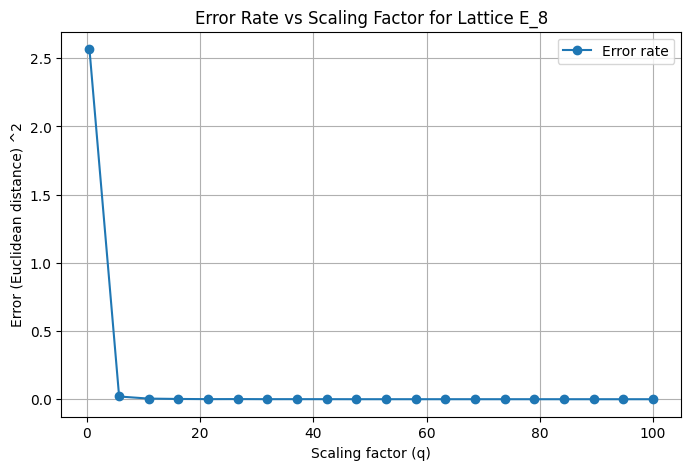

In [11]:

scaling_factors = np.linspace(0.5, 100, 20)
errors = []

for q in scaling_factors:
    scaled_x = x * q
    encoded_x = encode(scaled_x, closest_point_E8)
    decoded_x = decode(encoded_x, closest_point_E8) / q
    error = calculate_squared_error(x, decoded_x)
    errors.append(error)

# Plot the errors for different scaling factors
plt.figure(figsize=(8, 5))
plt.plot(scaling_factors, errors, label='Error rate', marker='o')
plt.xlabel('Scaling factor (q)')
plt.ylabel('Error (Euclidean distance) ^2')
plt.title('Error Rate vs Scaling Factor for Lattice E_8')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

In this notebook, we implemented the closest-point algorithms for lattices $D_n$ and $E_8$, encoded and decoded random Gaussian vectors using these lattices, and explored how scaling affects error rates. As we can see from the plot, larger scaling factors tend to reduce the error, but eventually, the error stabilizes due to the structure of the lattice.